## YC Top 100 companies


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from numpy import arange

yc = pd.read_csv('yc_top100_clean.csv', delimiter=',')

yc.head()

,company,rank,description,founders,sector,jobs_created,yc_batch
0,"<b class=""h4"">Airbnb</b>","<span class=""text-center"">#01</span>",<p>Airbnb is a global travel community that of...,Brian Chesky Joe Gebbia Nathan Blecharczyk,Consumer Goods and Services,"4,000",W2009
1,"<b class=""h4"">Stripe</b>","<span class=""text-center"">#02</span>",<p>Stripe builds economic infrastructure for t...,John Collison Patrick Collison,Financial Technology and Services,"1,300",S2010
2,"<b class=""h4"">Cruise</b>","<span class=""text-center"">#03</span>",<p>Cruise is building autonomous vehicles to s...,Kyle Vogt Daniel Kan,Automotive,1000,W2014
3,"<b class=""h4"">Dropbox</b>","<span class=""text-center"">#04</span>",<p>Dropbox is a global collaboration platform ...,Arash Ferdowsi Drew Houston,B2B Software and Services,"1,858",S2007
4,"<b class=""h4"">Coinbase</b>","<span class=""text-center"">#05</span>",<p>Coinbase is a digital currency wallet and p...,Brian Armstrong Fred Ehrsam,Financial Technology and Services,500,S2012


## Clean the table

We can see that the table needs a bit of cleaning. 
* The company column only needs to have the name of the company. 
* The rank column just needs to have the number of ranking 
* The description column needs p tags stripped 
* For the yc_batch column, I would only need to extract the year 

In [2]:
# Fix the company column 
yc['company'] = yc['company'].str.replace('<b class="h4">', '').str.replace("</b>",'').str.strip()

# Fix the rank column & convert to integer
yc['rank'] = yc['rank'].str.replace('<span class="text-center">#','').str.replace('</span>','').str.strip()
yc['rank'] = yc['rank'].astype(int)

#Fix the description column 
yc['description'] = yc['description'].str.replace('<p>','').str.replace('</p>','')

# Fix sector column 
yc['sector'] = yc['sector'].str.replace('Real Estate and Contruction', 'Real Estate and Construction')

# Delete the ',' and convert jobs_create to integer values 
yc['jobs_created'] = yc['jobs_created'].str.replace(',','')
yc['jobs_created'] = yc['jobs_created'].astype(int)
 
# Extract the year from yc_batch and conver to integer 
year_pattern = r'([1-2][0-9]{3})'
yc['yc_batch'] = yc['yc_batch'].str.extract(year_pattern)
yc['yc_batch'] = yc['yc_batch'].astype(int)

#Check 
yc.head()

,company,rank,description,founders,sector,jobs_created,yc_batch
0,Airbnb,1,Airbnb is a global travel community that offer...,Brian Chesky Joe Gebbia Nathan Blecharczyk,Consumer Goods and Services,4000,2009
1,Stripe,2,Stripe builds economic infrastructure for the ...,John Collison Patrick Collison,Financial Technology and Services,1300,2010
2,Cruise,3,Cruise is building autonomous vehicles to safe...,Kyle Vogt Daniel Kan,Automotive,1000,2014
3,Dropbox,4,Dropbox is a global collaboration platform whe...,Arash Ferdowsi Drew Houston,B2B Software and Services,1858,2007
4,Coinbase,5,Coinbase is a digital currency wallet and plat...,Brian Armstrong Fred Ehrsam,Financial Technology and Services,500,2012


## Acquired companies

In [3]:
acquired_pattern = r"[Aa]cquired by ([A-Za-z]+)"

yc['acquired_by'] = yc['description'].str.extract(acquired_pattern)
yc['acquired_by'] = yc['acquired_by'].fillna('Active')

yc.head()
yc['acquired_by'].value_counts()

Active        88
Square         2
Zynga          1
Google         1
IBM            1
Salesforce     1
Amazon         1
GM             1
Blackrock      1
SiriusXM       1
Conde          1
JPMorgan       1
Red            1
Name: acquired_by, dtype: int64

## Which sectors created more jobs

In [4]:
yc_sectors = yc['sector'].value_counts()
yc_sectors


B2B Software and Services            49
Consumer Goods and Services          16
Consumer Media                       10
Financial Technology and Services     9
Healthcare                            5
Industrial                            2
Automotive                            2
Real Estate and Construction          2
Education                             2
Blockchain                            1
Consumer Goods                        1
Aerospace                             1
Agriculture                           1
Name: sector, dtype: int64

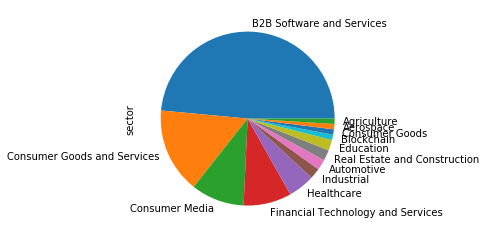

In [5]:
yc_sectors.plot(kind='pie')

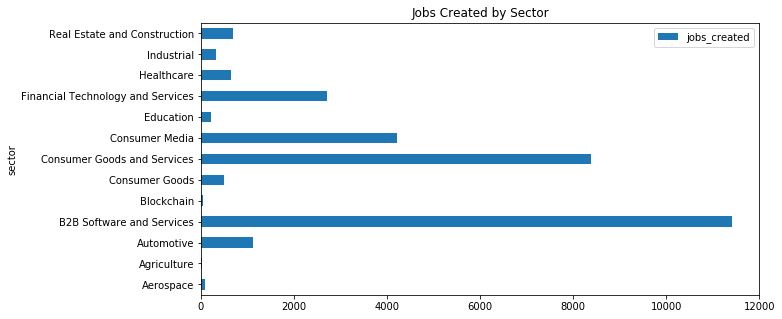

In [6]:
jobs_by_sector = yc.pivot_table(values='jobs_created', index='sector', aggfunc=np.sum)
jobs_by_sector.plot(kind='barh', figsize=(10,5), title='Jobs Created by Sector', sort_columns=False)

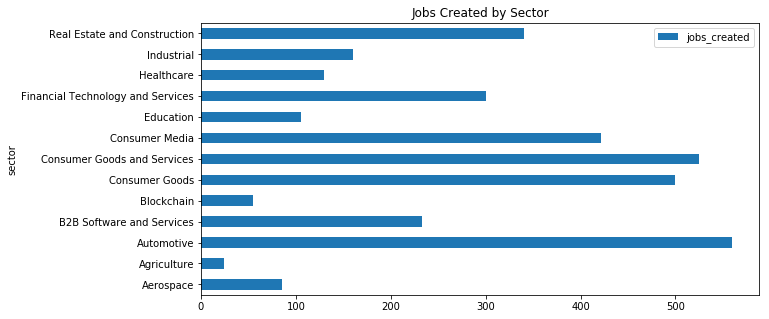

In [7]:
jobs_by_sector = yc.pivot_table(values='jobs_created', index='sector', aggfunc=np.mean)
jobs_by_sector.plot(kind='barh', figsize=(10,5), title='Jobs Created by Sector', sort_columns=False)

In [8]:
yc[yc['sector']=='B2B Software and Services']

,company,rank,description,founders,sector,jobs_created,yc_batch,acquired_by
3,Dropbox,4,Dropbox is a global collaboration platform whe...,Arash Ferdowsi Drew Houston,B2B Software and Services,1858,2007,Active
8,Zenefits,9,Zenefits provides HR solutions for the new wor...,Laks Srini Parker Conrad,B2B Software and Services,500,2013,Active
9,Gusto,10,"Gusto automates and simplifies payroll, benefi...",Josh Reeves Tomer London Edward Kim,B2B Software and Services,700,2012,Active
11,PagerDuty,12,PagerDuty is the leading digital ops managemen...,Baskar Puvanathasan Andrew Miklas Alex Solom...,B2B Software and Services,450,2010,Active
12,Docker,13,Docker is a modern platform for all applicatio...,Solomon Hykes Sebastien Pahl,B2B Software and Services,400,2010,Active
16,GitLab,17,GitLab is the first single application built f...,Sid Sijbrandij Dmitriy Zaporozhets,B2B Software and Services,200,2015,Active
18,Flexport,19,"Flexport moves freight globally by air, ocean,...",Ryan Petersen,B2B Software and Services,600,2014,Active
19,Mixpanel,20,Mixpanel is a user analytics platform that let...,Suhail Doshi Tim Trefren,B2B Software and Services,300,2009,Active
20,Checkr,21,Checkr provides modern and compliant backgroun...,Jonathan Perichon Daniel Yanisse,B2B Software and Services,240,2014,Active
21,Optimizely,22,Optimizely is the leading experimentation plat...,Pete Koomen Dan Siroker,B2B Software and Services,400,2010,Active


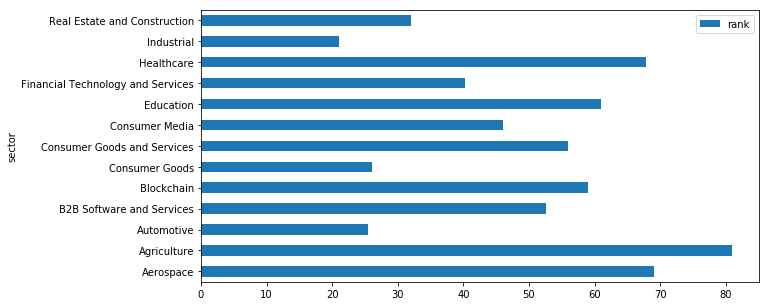

In [9]:
rank = yc.pivot_table(values='rank', index='sector', aggfunc=np.mean)
rank.plot(kind='barh', figsize=(10,5))

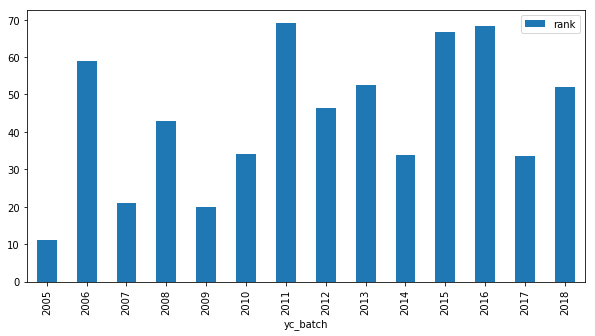

In [10]:
yc_year_rank = yc.pivot_table(values='rank', index='yc_batch')
yc_year_rank.plot(kind='bar', figsize=(10,5))

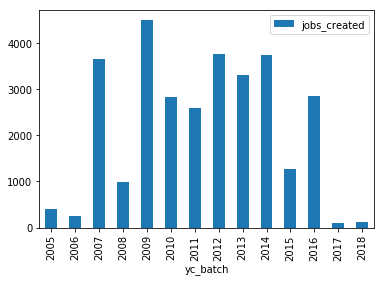

In [11]:
yc_year_jobs = yc.pivot_table(values='jobs_created', index='yc_batch', aggfunc=np.sum)
yc_year_jobs.plot(kind='bar')

In [12]:
yc[yc['yc_batch'] == 2009]
#yc[yc['yc_batch'] == 2007]


,company,rank,description,founders,sector,jobs_created,yc_batch,acquired_by
0,Airbnb,1,Airbnb is a global travel community that offer...,Brian Chesky Joe Gebbia Nathan Blecharczyk,Consumer Goods and Services,4000,2009,Active
19,Mixpanel,20,Mixpanel is a user analytics platform that let...,Suhail Doshi Tim Trefren,B2B Software and Services,300,2009,Active
38,WePay,39,WePay is an integrated payments provider desig...,Bill Clerico Richard Aberman,Financial Technology and Services,200,2009,JPMorgan


How many founders

In [13]:
pattern = r'([A-Z])\w+'

number_of_founders = yc['founders'].str.count(pattern) / 2
number_of_founders.mean()

def founder_cats(val):
    if val < 2:
        return "1 Founder"
    elif val <3:
        return "2 Founders"
    elif val <4:
        return '3 Founders'
    else: 
        return "4+ Founders"
#number_of_founders.value_counts() 

founder_groups = number_of_founders.apply(founder_cats)
founder_groups.value_counts()



2 Founders     56
3 Founders     25
1 Founder      12
4+ Founders     8
Name: founders, dtype: int64

In [14]:
yc['jobs_created'].sum()

30377

In [15]:
yc['jobs_created'].mean()

300.76237623762376